In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
df = pd.read_excel('stock_prices.xlsx', parse_dates=[0])
df.sort_values('Date', ascending=True, inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df

,Date,Open,High,Low,Close,Adj Close*,Volume
0,2018-03-20,49.86,49.86,49.15,49.67,49.67,736.400
1,2018-03-21,49.88,50.58,49.88,50.27,50.27,789.000
2,2018-03-22,50.64,50.77,49.90,49.91,49.91,377.200
3,2018-03-23,49.96,50.68,49.64,50.64,50.64,559.800
4,2018-03-24,51.16,51.47,50.87,51.06,51.06,85.911


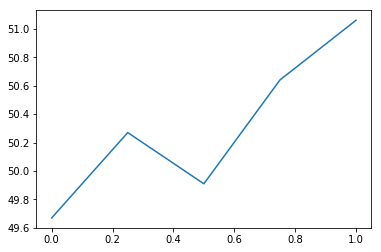

In [32]:
adj_close = df['Adj Close*']
time = np.linspace(0, 1, len(adj_close))
plt.plot(time, adj_close)
plt.show()

In [33]:
def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1./N                                    # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b

In [34]:
# drift and diffusion coefficients
def daily_return(adj_close):
    returns = []
    for i in range(0, len(adj_close)-1):
        today = adj_close[i+1]
        yesterday = adj_close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

In [35]:
returns = daily_return(adj_close)

mu = np.mean(returns)*5.           # drift coefficient
sig = np.std(returns)*np.sqrt(5.)  # diffusion coefficient

print(mu, sig)

0.03479820452548055 0.018913461650726136


In [36]:
# GBM Exact Solution

# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments

def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0.,1.,N+1)
    S = []
    S.append(So)
    for i in range(1,int(N+1)):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S, t

Text(0.5, 1.0, 'Geometric Brownian Motion')

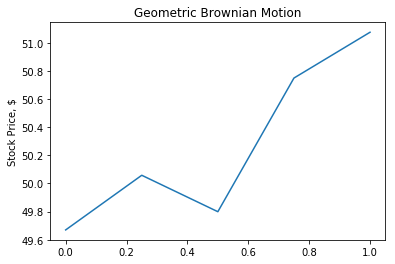

In [37]:
N  = 4     # increments
seed = 22
So = adj_close[0]            # Initial stock price
W = Brownian(seed, N)[0]
T = 1.

soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.plot(t, soln)
plt.ylabel('Stock Price, $')
plt.title('Geometric Brownian Motion')

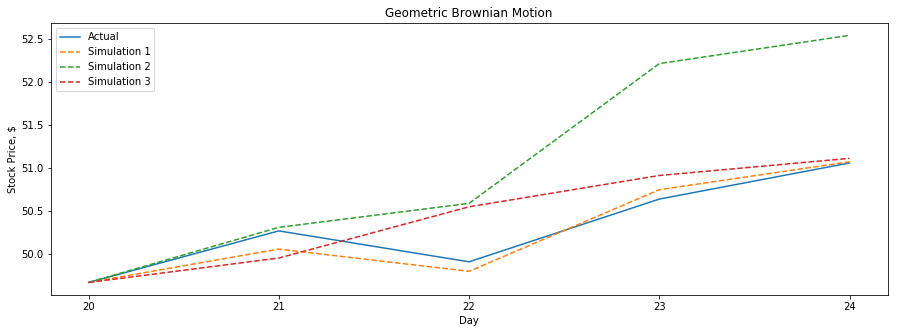

In [38]:
seed = 5
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sig, W, T, N)[0]    

seed = 15
W = Brownian(seed, N)[0]
soln3 = GBM(So, mu, sig, W, T, N)[0]    

plt.figure(figsize=(15,5))
plt.plot(time, adj_close, label = 'Actual')
plt.plot(t, soln, label = 'Simulation 1', ls = '--')
plt.plot(t, soln2, label = 'Simulation 2', ls = '--')
plt.plot(t, soln3, label = 'Simulation 3', ls = '--')

plt.ylabel('Stock Price, $')
plt.xlabel('Day')
plt.title('Geometric Brownian Motion')
plt.xticks(np.linspace(0.,1.,5),[20, 21, 22, 23, 24])
plt.legend(loc = 'upper left')

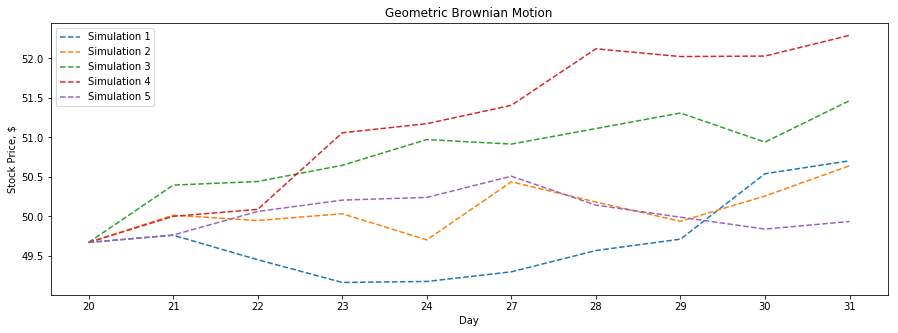

In [39]:
So = adj_close[0]            # Initial stock price
T = 1.
N = 9

seed = 33
W = Brownian(seed, N)[0]
soln4 = GBM(So, mu, sig, W, T, N)[0]

seed = 122
W = Brownian(seed, N)[0]
soln5 = GBM(So, mu, sig, W, T, N)[0]

seed = 7
W = Brownian(seed, N)[0]
soln6 = GBM(So, mu, sig, W, T, N)[0] 

seed = 5
W = Brownian(seed, N)[0]
soln7 = GBM(So, mu, sig, W, T, N)[0]    

seed = 15
W = Brownian(seed, N)[0]
soln8 = GBM(So, mu, sig, W, T, N)[0]    
t = GBM(So, mu, sig, W, T, N)[1] 

plt.figure(figsize=(15,5))
plt.plot(t, soln4, label = 'Simulation 1', ls = '--')
plt.plot(t, soln5, label = 'Simulation 2', ls = '--')
plt.plot(t, soln6, label = 'Simulation 3', ls = '--')
plt.plot(t, soln7, label = 'Simulation 4', ls = '--')
plt.plot(t, soln8, label = 'Simulation 5', ls = '--')

plt.ylabel('Stock Price, $')
plt.xlabel('Day')
plt.title('Geometric Brownian Motion')
plt.xticks(np.linspace(0.,1.,N+1),[20, 21, 22, 23, 24, 27, 28, 29, 30, 31])
plt.legend(loc = 'upper left')
plt.savefig('simulation.png')
plt.show()